# Individual Project: Predicting a College's Graduation Rate with Regression

Christopher Mayorga - July 9, 2021

# Executive Summary

## Problem

- Many young people today debate whether college is worth it or not. Part of the problem is varying completion rates across colleges and universities. Some colleges boast high graduation rates while others are less transparent.

## Goal

- My goal is to use the dataset provided by US News and World Report to provide insight on potential drivers for graduation rates. This would give prospective students an idea of what statistics to focus on when picking a college.

## Process

- Acquire the Data
- Prepare
- Explore
- Model
- Create Recommendations Based on Findings

## Findings

- TBD

In [9]:
# packages for data analysis & mapping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from math import sqrt
import seaborn as sns
from datetime import date 

# modeling methods
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression, RFE 
import sklearn.preprocessing

# address warnings
import warnings
warnings.filterwarnings("ignore")

# Acquire

## What data are we working with?

### U.S. News and World Report's College Data

**Description**

Statistics for a large number of US Colleges from the 1995 issue of US News and World Report.

**Format**

A data frame with 777 observations on the following 18 variables.

`Private`
A factor with levels No and Yes indicating private or public university

`Apps`
Number of applications received

`Accept`
Number of applications accepted

`Enroll`
Number of new students enrolled

`Top10perc`
Pct. new students from top 10% of H.S. class

`Top25perc`
Pct. new students from top 25% of H.S. class

`F.Undergrad`
Number of fulltime undergraduates

`P.Undergrad`
Number of parttime undergraduates

`Outstate`
Out-of-state tuition

`Room.Board`
Room and board costs

`Books`
Estimated book costs

`Personal`
Estimated personal spending

`PhD`
Pct. of faculty with Ph.D.'s

`Terminal`
Pct. of faculty with terminal degree

`S.F.Ratio`
Student/faculty ratio

`perc.alumni`
Pct. alumni who donate

`Expend`
Instructional expenditure per student

`Grad.Rate`
Graduation rate

**Source**

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the ASA Statistical Graphics Section's 1995 Data Analysis Exposition.

**References**

James, G., Witten, D., Hastie, T., and Tibshirani, R. (2013) An Introduction to Statistical Learning with applications in R, www.StatLearning.com, Springer-Verlag, New York

In [ ]:
from Acquire import get_college_data

In [53]:
# Read in csv as Pandas dataframe

df = get_college_data()

In [8]:
# Take a look at our data
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [12]:
# See how many rows and columns there are
df.shape

(777, 19)

In [10]:
# Take a look at columns and null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

No nulls - awesome! Means I won't have to do any imputing.

In [11]:
# look at summary statistics
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


Lots of numeric columns to work with.

<AxesSubplot:xlabel='Grad.Rate'>

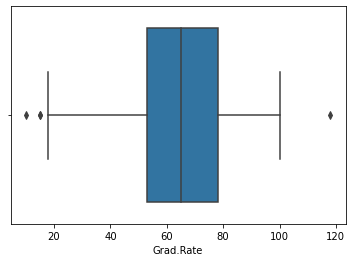

In [13]:
# Boxplot to look at distribution of Grad.Rate
sns.boxplot(x='Grad.Rate', data=df)

In [16]:
df[df['Grad.Rate'] == 118]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


## Acquire Takeaways
- A very clean dataset
- Noticed some irregularities -- for example, max graduation rate is 118% - clerical error?
- Should create some new columns in prepare, like acceptance rate
- Re-name some columns, like name of college
- Encode `Private` column into a numeric dtype

# Prepare

To do in prepare:
- Rename columns
- Create `AcceptanceRate` column
- Change Cazenovia College GradRate to mean GradRate
- Encode `Private` column into numeric dtype

In [55]:
from Prepare import clean_college_data, train_validate_test

In [56]:
df = clean_college_data(df)